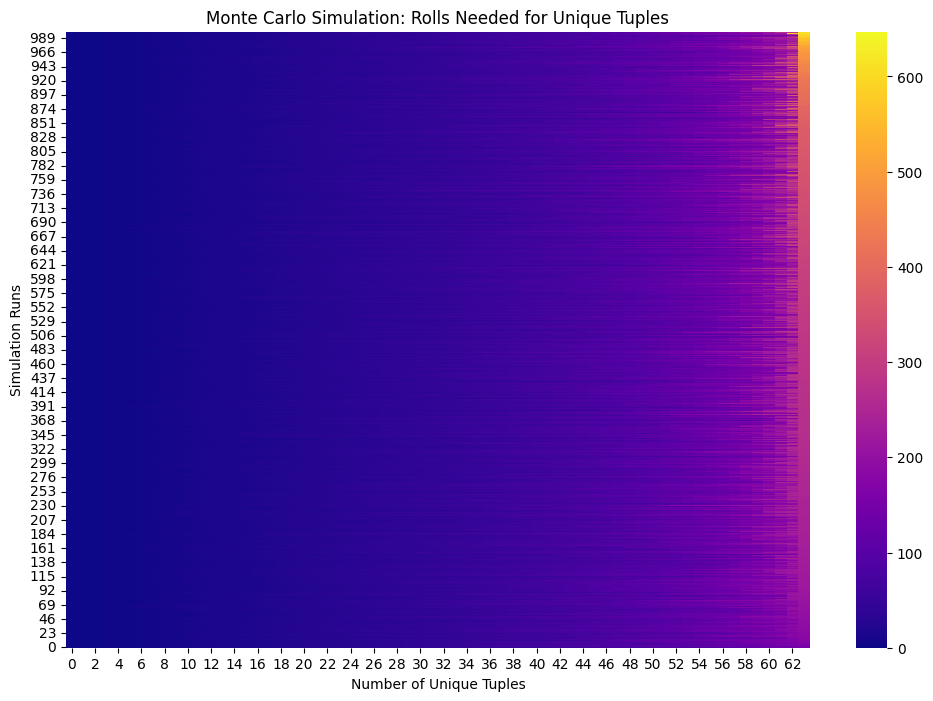

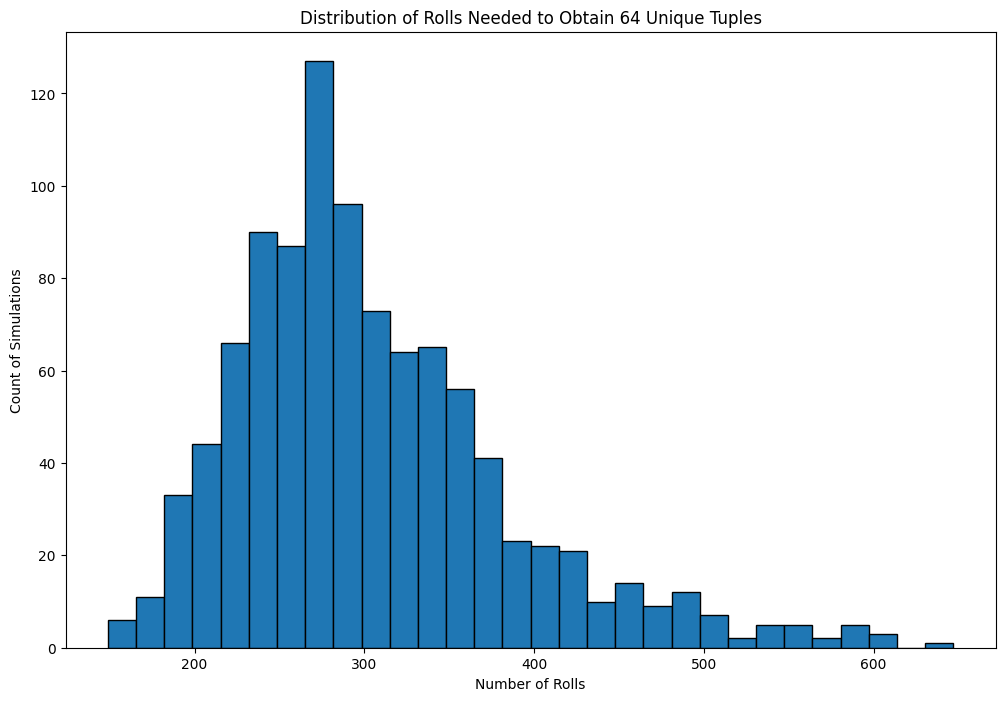

In [2]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns


def monte_carlo_simulation(
    runs=1000, unique_values_previously_acquired=0, total_rolls_previously=0
):
    results = []

    for _ in range(runs):
        if unique_values_previously_acquired > 0:
            unique_values = set(range(unique_values_previously_acquired))
        else:
            unique_values = set()

        if total_rolls_previously > 0:
            counter = total_rolls_previously
        else:
            counter = 0

        rolls_needed = []

        while len(unique_values) < 64:
            value = np.random.randint(0, 64)
            if value not in unique_values:
                unique_values.add(value)
                rolls_needed.append(counter)
            counter += 1

        results.append(rolls_needed)

    return results


def aggregate_and_sort_results(simulation_results):
    data = {str(i): [] for i in range(64)}

    # Create a DataFrame to store the results
    for run in simulation_results:
        for i, rolls in enumerate(run):
            data[str(i)].append(rolls)
        for i in range(len(run), 64):
            data[str(i)].append(
                run[-1]
            )  # Fill remaining values with the last roll count

    df = pl.DataFrame(data)
    # Add a column for the total number of rolls needed to finish each simulation
    df = df.with_columns(
        [pl.max_horizontal([pl.col(str(i)) for i in range(64)]).alias("total_rolls")]
    )
    # Sort by the total number of rolls
    df = df.sort("total_rolls")
    return df


def plot_heatmap(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.drop("total_rolls").to_numpy(), cmap="plasma", cbar=True)
    plt.title("Monte Carlo Simulation: Rolls Needed for Unique Tuples")
    plt.xlabel("Number of Unique Tuples")
    plt.ylabel("Simulation Runs")
    plt.gca().invert_yaxis()  # Invert the y-axis
    plt.show()


def plot_histogram(df):
    plt.figure(figsize=(12, 8))
    total_rolls = df.select("total_rolls").to_series()
    plt.hist(total_rolls, bins=30, edgecolor="black")
    plt.title("Distribution of Rolls Needed to Obtain 64 Unique Tuples")
    plt.xlabel("Number of Rolls")
    plt.ylabel("Count of Simulations")
    plt.show()


# Run the simulation
simulation_results = monte_carlo_simulation(1000)
# Aggregate and sort the results
aggregated_sorted_results = aggregate_and_sort_results(simulation_results)
# Plot the heatmap
plot_heatmap(aggregated_sorted_results)
# Plot the histogram
plot_histogram(aggregated_sorted_results)

In [ ]:
run_count = 0

In [ ]:
run_count += 1
print(run_count)

# Tracking total Landing chest runs between Exotic Class item drops.  

Each run is 5 chests (with occasional yellow bar boss chest drops).

Does not count the last run where the exotic class item drops, so total chests is around 5 * <the number of runs> + 5.  Seems strongly biased towards about 40-50 chests.

- 14
- 4
- 8
- 9
- 8
- 10
- 8
- 8
- 6
- 7
- 9
